<a href="https://colab.research.google.com/github/Komal-londhe/Customer-Churn-Prediction/blob/main/Dataset_CRMDukeUniversity_CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

Predicting customer churn is critical for telecommunication companies to be able to effectively retain customers. It is more costly to acquire new customers than to retain existing ones. For this reason, large telecommunications corporations are seeking to develop models to predict which customers are more likely to change and take actions accordingly. In this article, we build a model to predict how likely a customer will churn by analyzing its characteristics. The objective is to obtain a data-driven solution that will allow us to reduce churn rates and, as a consequence, to increase customer satisfaction and corporation revenue.

# Dataset Information

The data set used in this article is available in the Kaggle and contains fifty eight columns (independent variables) that indicate the characteristics of the clients provided by Teradata centre for customer relationship management at Duke University. The Churn column (target variable) indicates whether the customer departed within the last month or not. The class 'No' includes the clients that did not leave the company last month, while the class 'Yes' contains the clients that decided to terminate their relations with the company. The objective of the analysis is to obtain the relation between the customer’s characteristics and the churn.


https://www.kaggle.com/jpacse/datasets-for-churn-telecom/metadata


The data set available in Kaggle from Duke University.

https://www.fuqua.duke.edu/faculty-research/centers



# CRISP - DM Methodology

- 1. Data Loading
- 2. Data Cleaning
- 3. Exploratory Data Analysis using Data Visualization
- 4. Data Preprocessing
- 5. Model Selection
- 6. Model Evaluation
- 7. Future Predictions
- 8. Model Deployment

# 1. Data Loading

Importing Required libraries

In [ ]:
#Standard libraries for data analysis:   
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sns
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [ ]:
# Loading data into dataframe using read_csv()
dataset2 = pd.read_csv('cell2celltrain_NEW.csv')

In [ ]:
# view the data using head() - by default displys first 5 rows of data
dataset2.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [ ]:
# Check concise summary of the dataframe
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [ ]:
# Check column names 
dataset2.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

As shown above, the data set contains **58 independent variables (51 Categorical & 6 Continuous)**, which can be classified into 3 groups:


# 2. Data Cleaning

In [ ]:
# Printing the number of rows & columns
print("Total number of rows in dataset1 = ",dataset2.shape[0], "  , Total number of columns in dataset1 = ", dataset2.shape[1])
 
# Grouping the dataset to check for null values
dataset2.columns.to_series().groupby(dataset2.dtypes).groups

# Display True if there are null values else display false in front of column names
dataset2.isna().any()

Total number of rows in dataset1 =  51047   , Total number of columns in dataset1 =  58


CustomerID                   False
Churn                        False
MonthlyRevenue                True
MonthlyMinutes                True
TotalRecurringCharge          True
DirectorAssistedCalls         True
OverageMinutes                True
RoamingCalls                  True
PercChangeMinutes             True
PercChangeRevenues            True
DroppedCalls                 False
BlockedCalls                 False
UnansweredCalls              False
CustomerCareCalls            False
ThreewayCalls                False
ReceivedCalls                False
OutboundCalls                False
InboundCalls                 False
PeakCallsInOut               False
OffPeakCallsInOut            False
DroppedBlockedCalls          False
CallForwardingCalls          False
CallWaitingCalls             False
MonthsInService              False
UniqueSubs                   False
ActiveSubs                   False
ServiceArea                   True
Handsets                      True
HandsetModels       

As we can see there are missing values in few Columns. Instead of removing the columns or rows, we will fill the missing values by mean values.

In [ ]:
na_cols = dataset2.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset2.columns[1:]:
     if col in na_cols:
        if dataset2[col].dtype != 'object':
             dataset2[col] =  dataset2[col].fillna(dataset2[col].mean()).round(0)

In [ ]:
# Check again after filling null values
dataset2.isna().any()

CustomerID                   False
Churn                        False
MonthlyRevenue               False
MonthlyMinutes               False
TotalRecurringCharge         False
DirectorAssistedCalls        False
OverageMinutes               False
RoamingCalls                 False
PercChangeMinutes            False
PercChangeRevenues           False
DroppedCalls                 False
BlockedCalls                 False
UnansweredCalls              False
CustomerCareCalls            False
ThreewayCalls                False
ReceivedCalls                False
OutboundCalls                False
InboundCalls                 False
PeakCallsInOut               False
OffPeakCallsInOut            False
DroppedBlockedCalls          False
CallForwardingCalls          False
CallWaitingCalls             False
MonthsInService              False
UniqueSubs                   False
ActiveSubs                   False
ServiceArea                   True
Handsets                     False
HandsetModels       

Still we can see Column ServiceArea with null values.

In [ ]:
# dropping rows with null values
dataset2 = dataset2.dropna(subset=['ServiceArea'])
dataset2.isna().any()

CustomerID                   False
Churn                        False
MonthlyRevenue               False
MonthlyMinutes               False
TotalRecurringCharge         False
DirectorAssistedCalls        False
OverageMinutes               False
RoamingCalls                 False
PercChangeMinutes            False
PercChangeRevenues           False
DroppedCalls                 False
BlockedCalls                 False
UnansweredCalls              False
CustomerCareCalls            False
ThreewayCalls                False
ReceivedCalls                False
OutboundCalls                False
InboundCalls                 False
PeakCallsInOut               False
OffPeakCallsInOut            False
DroppedBlockedCalls          False
CallForwardingCalls          False
CallWaitingCalls             False
MonthsInService              False
UniqueSubs                   False
ActiveSubs                   False
ServiceArea                  False
Handsets                     False
HandsetModels       

In [ ]:
# Check with shape of data after cleaning data
dataset2.shape

(51023, 58)

In [ ]:
#Unique values in each categorical variable:
print("\nNumber of unique values in Credit Rating of dataset2 : ", dataset2["CreditRating"].nunique())
print("Different Credit Ratings : \n", dataset2["CreditRating"].unique())
print("\nNumber of unique values in Prizm Code of dataset2 : ", dataset2["PrizmCode"].nunique())
print("Different Prizm Codes : \n", dataset2["PrizmCode"].unique())
print("\nNumber of unique values in Occupation of dataset2 : ", dataset2["Occupation"].nunique())
print("Different Occupations : \n", dataset2["Occupation"].unique())
print("\nNumber of unique values in HandsetPrice of dataset2 : ", dataset2["HandsetPrice"].nunique())
print("Different HandsetPrice : \n", dataset2["HandsetPrice"].unique())
print("\nNumber of unique values in Service Area of dataset2 : ", dataset2["ServiceArea"].nunique())



Number of unique values in Credit Rating of dataset2 :  7
Different Credit Ratings : 
 ['1-Highest' '4-Medium' '3-Good' '6-VeryLow' '2-High' '5-Low' '7-Lowest']

Number of unique values in Prizm Code of dataset2 :  4
Different Prizm Codes : 
 ['Suburban' 'Town' 'Other' 'Rural']

Number of unique values in Occupation of dataset2 :  8
Different Occupations : 
 ['Professional' 'Crafts' 'Other' 'Self' 'Retired' 'Homemaker' 'Clerical'
 'Student']

Number of unique values in HandsetPrice of dataset2 :  16
Different HandsetPrice : 
 ['30' 'Unknown' '10' '80' '150' '300' '40' '200' '100' '130' '60' '400'
 '240' '250' '180' '500']

Number of unique values in Service Area of dataset2 :  747


# 3. Exploratory Data Analysis using Data Visualization

**1. Visualizing all column data**

In [ ]:
# Distribution graphs (histogram/bar graph) of column data 
# Function to visualize columns
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

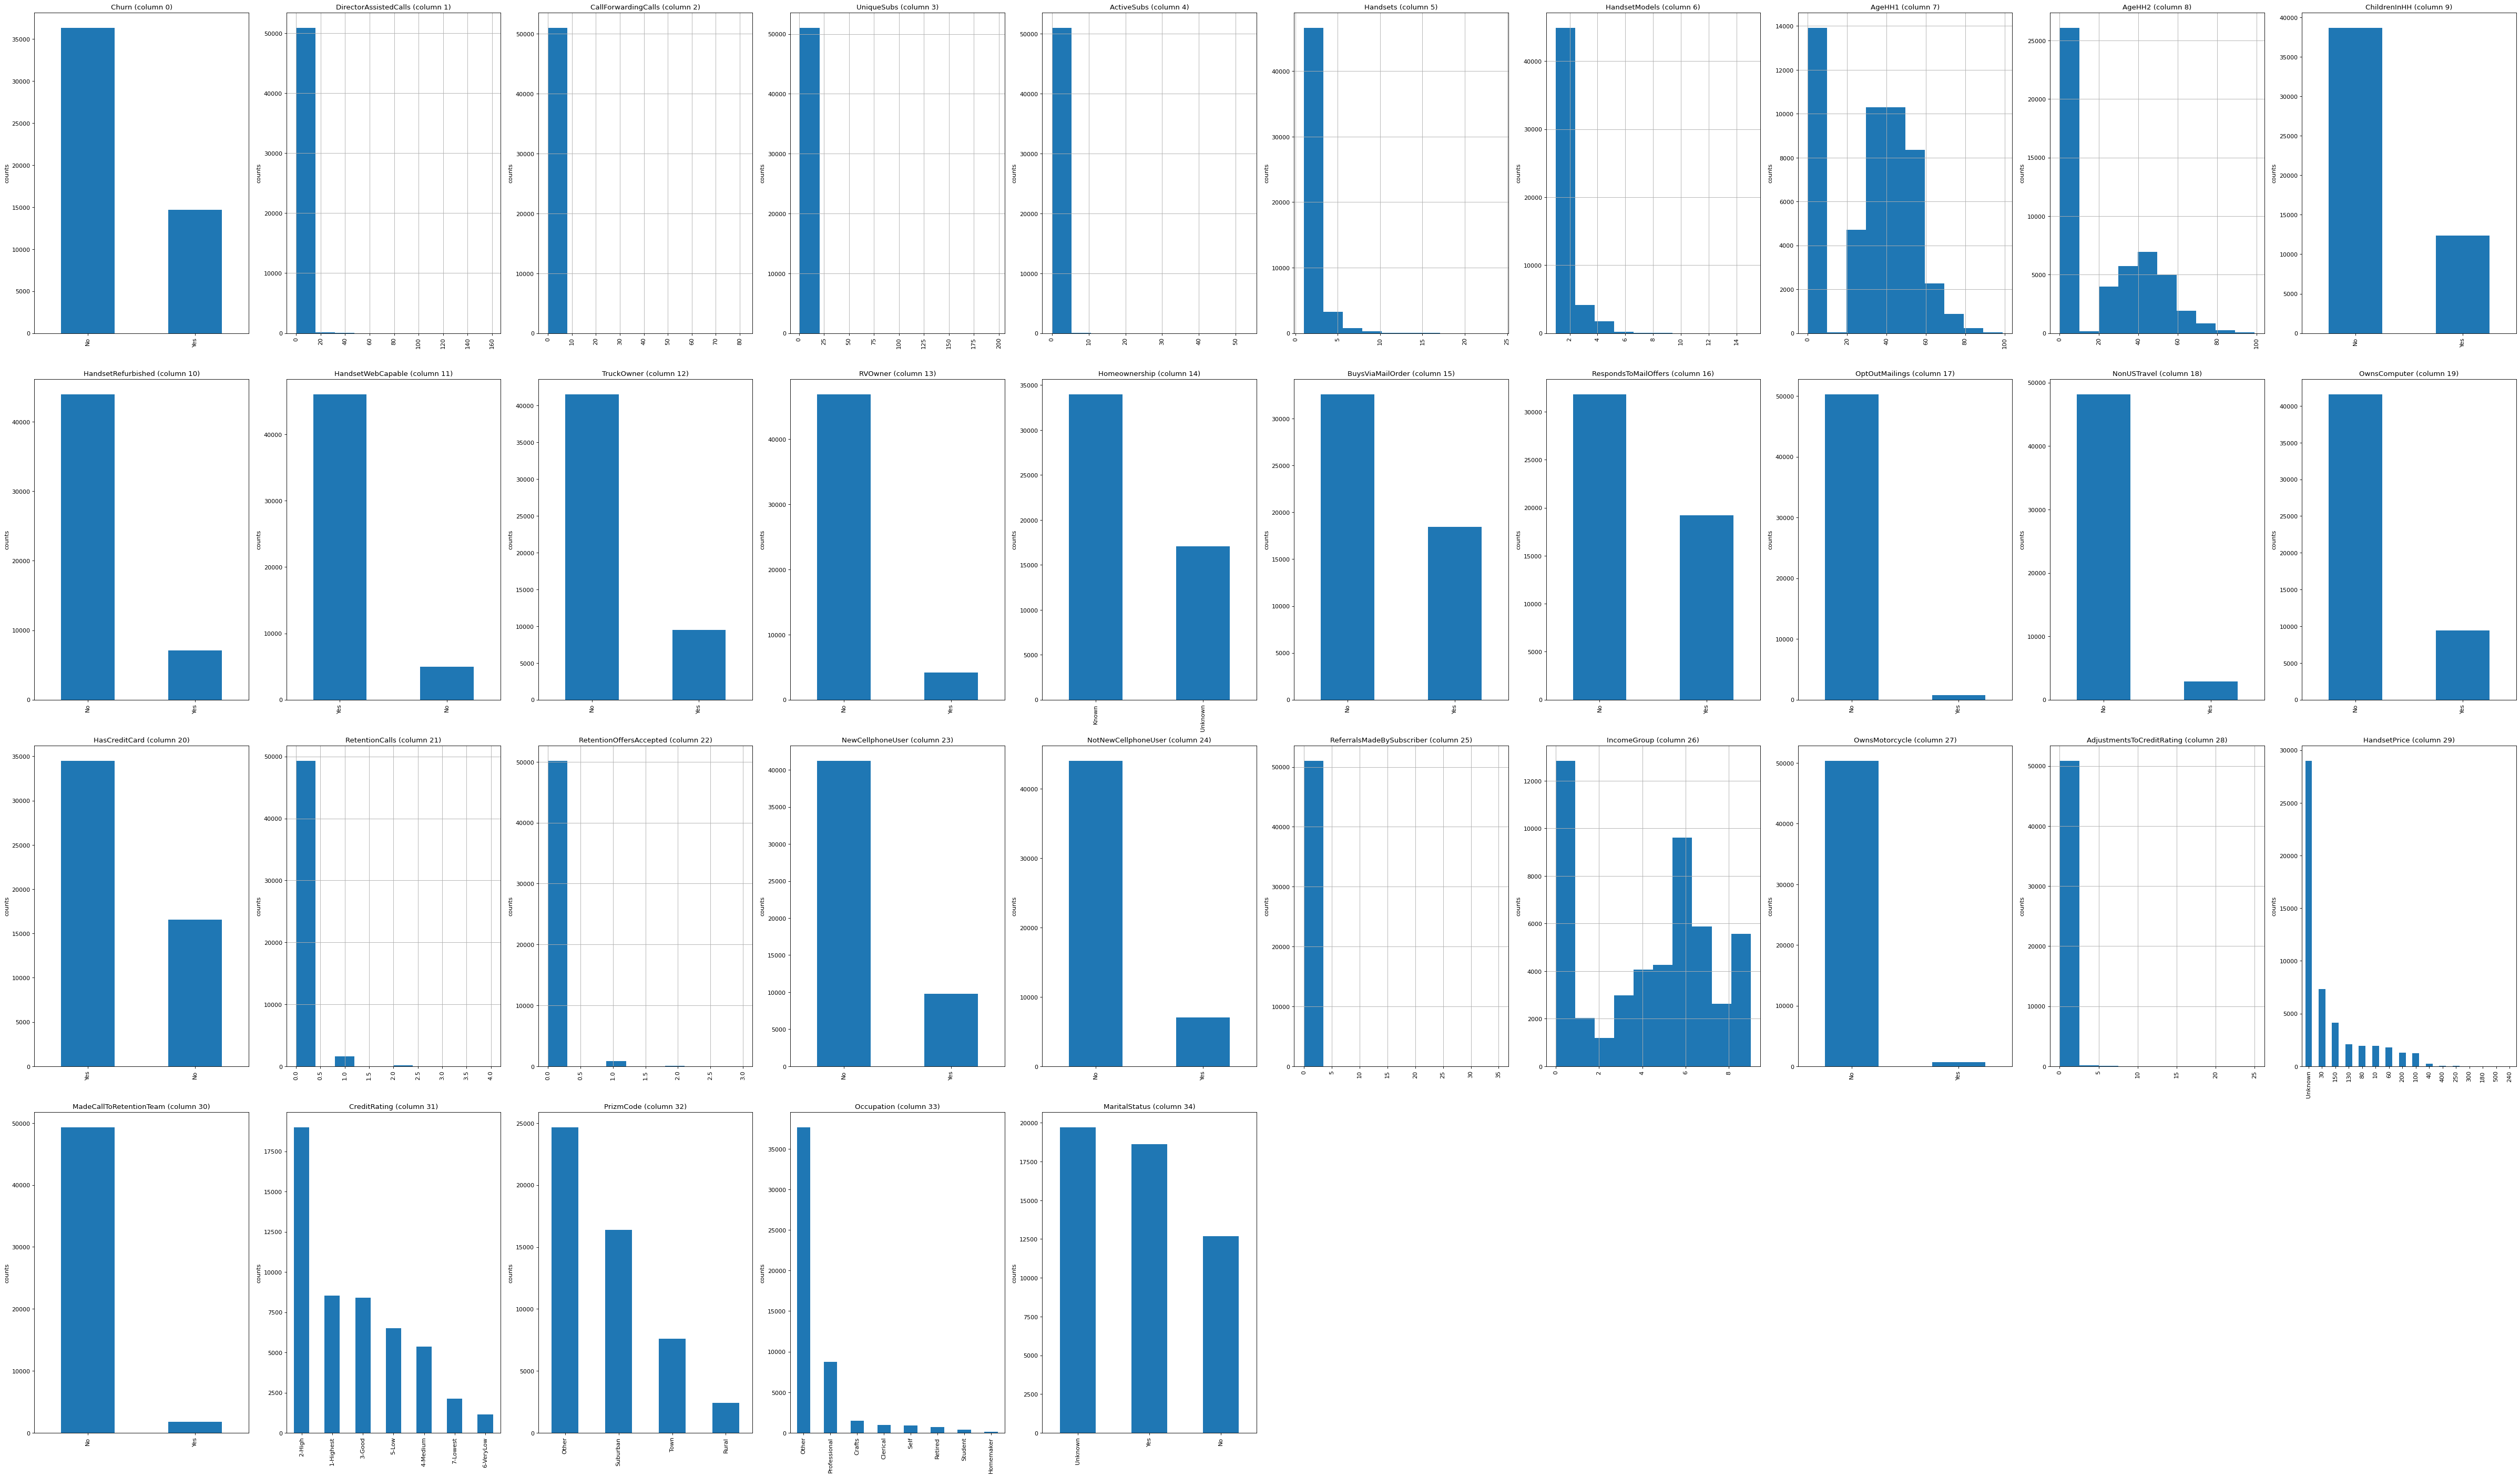

In [ ]:
plotPerColumnDistribution(dataset2, 58, 10)

**Target Variable**

The following pie chart shows the percentage of observations that correspond to each class of the target variable: 'No' and 'Yes'. As shown below, this is an imbalanced data set because both classes are not equally distributed among all observations, being 'No' the majority class (71.2%).

In [ ]:
print("Number of rows with Churn as Yes/No \n", dataset2["Churn"].value_counts())
churn=dataset2['Churn'].value_counts()
fig = px.pie(dataset2, values=churn.values, names=['No','Yes'],color_discrete_sequence=px.colors.sequential.RdBu,
            title='Churn Breakdown')
fig.show()

Number of rows with Churn as Yes/No 
 No     36324
Yes    14699
Name: Churn, dtype: int64


**2. Visualizing data with respect to target variable 'Churn'**

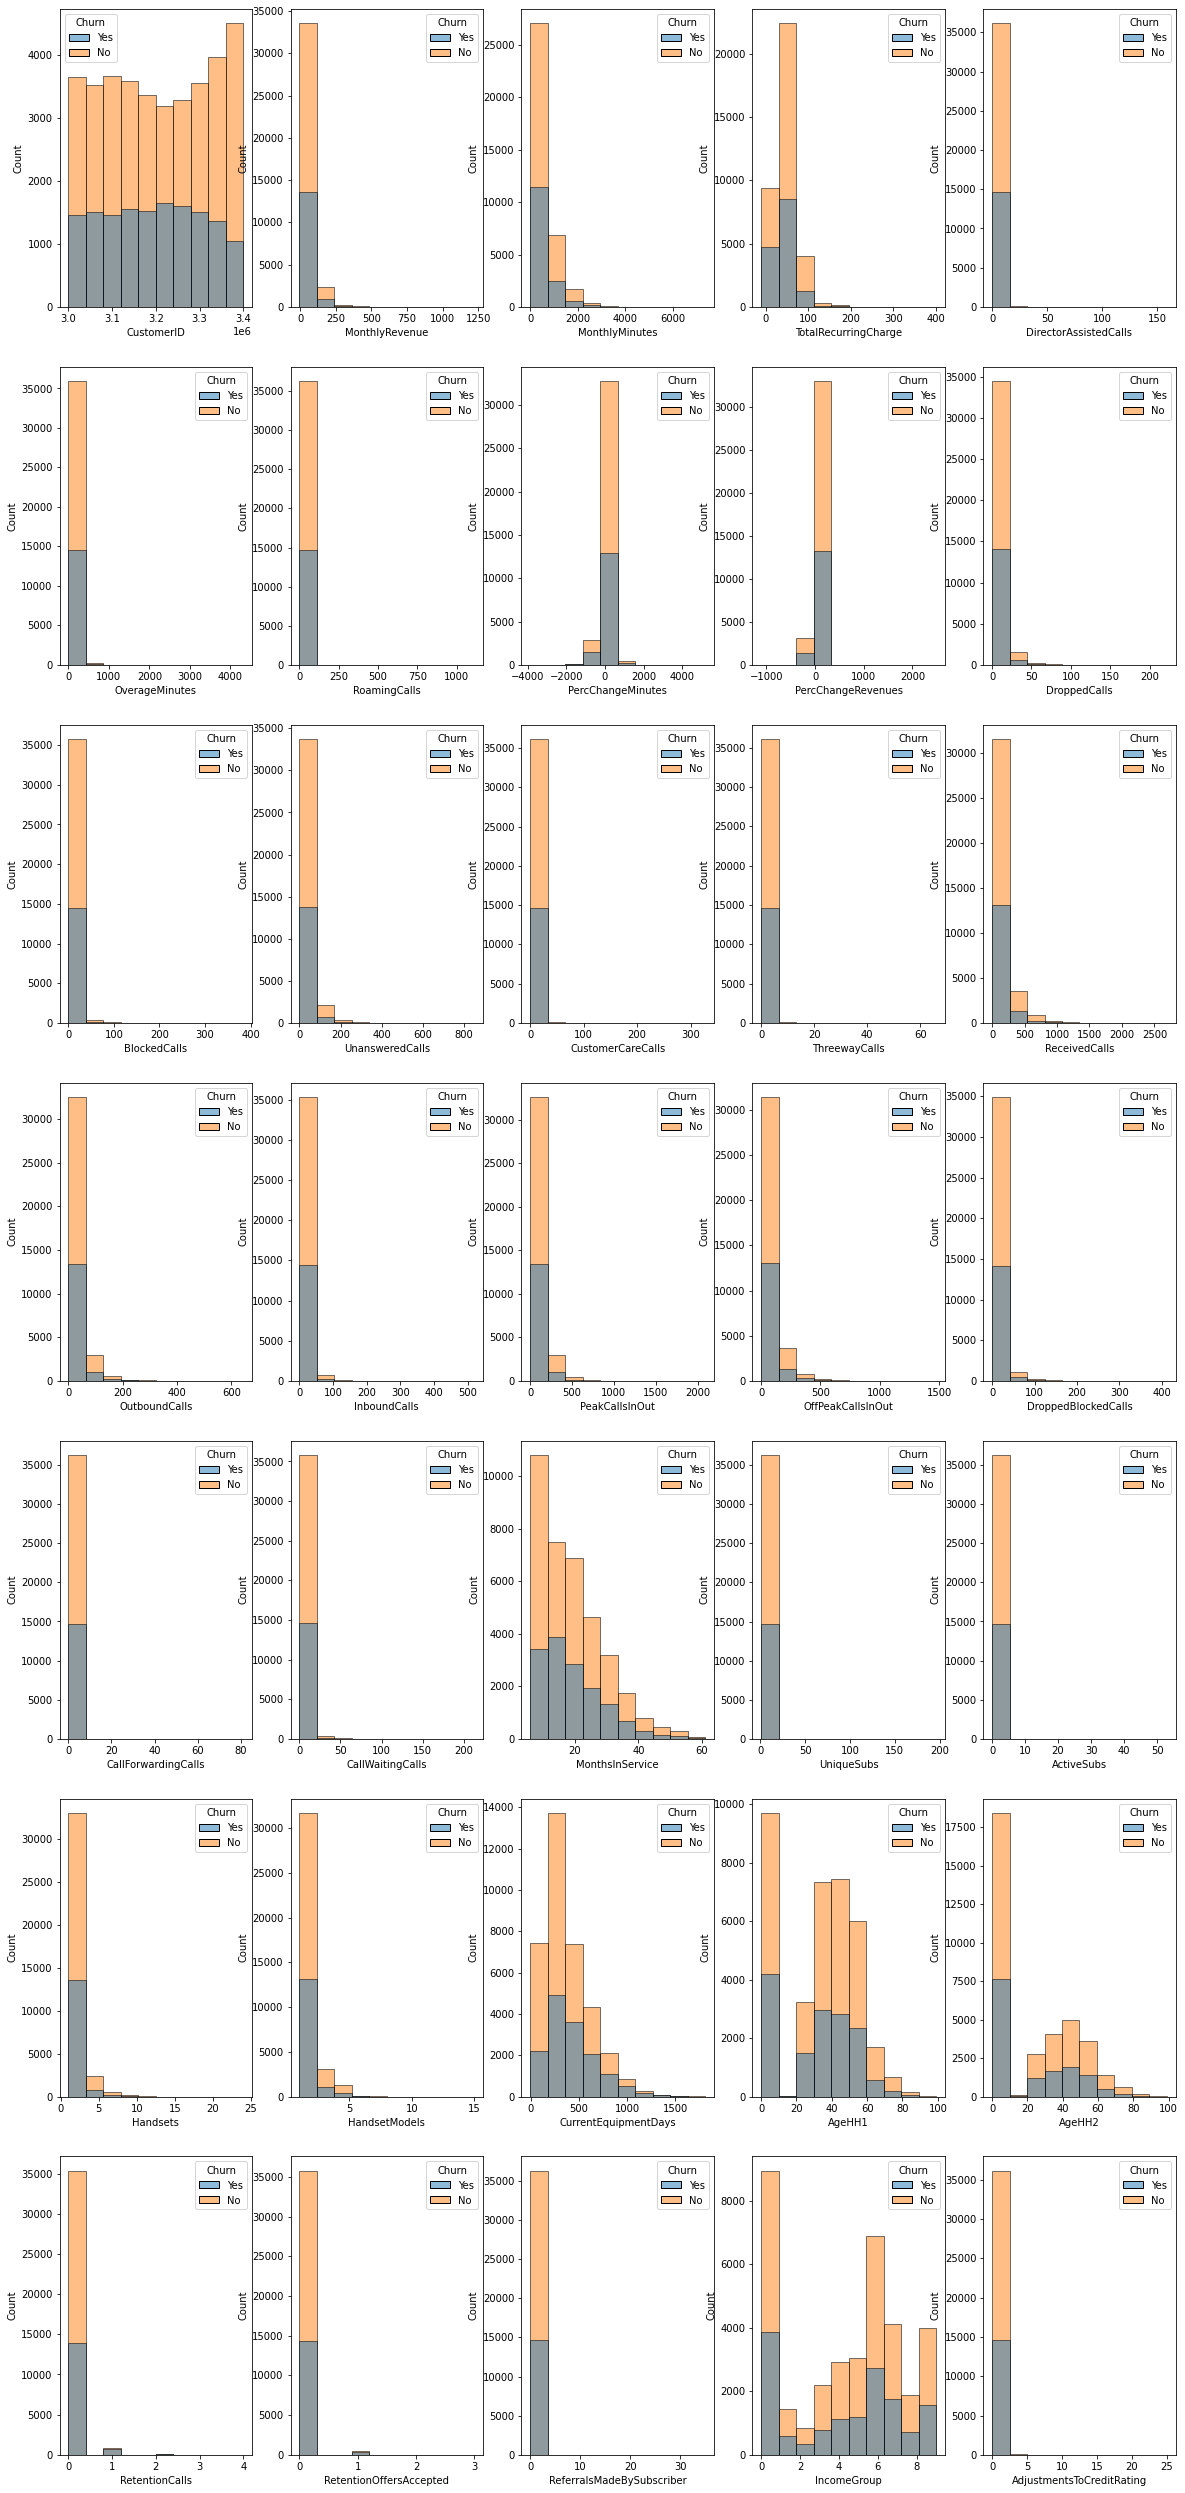

In [ ]:
## lets visualize distribution of numeric variables with repect to Churn.
## I don't see any striking patterns though
plots_per_row = 5

number_of_plots = dataset2.select_dtypes(exclude=['object']).shape[-1]

fig, axes = plt.subplots((number_of_plots//plots_per_row)+(number_of_plots%5!=0),plots_per_row) 

axes = axes.flatten()
i = 0
for index,col in dataset2.select_dtypes(exclude=['object']).columns.to_series().items():    
    a = sns.histplot(data=dataset2, x=col, hue="Churn", ax=axes[i],kde=False,bins=10)
    i+=1
    
for i in range(1,len(axes)-number_of_plots+1):
    fig.delaxes(axes[-i]) # remove empty subplot
# plt.tight_layout()
fig.set_figwidth(20)
fig.set_figheight(45)

plt.show()

In [ ]:
# now lets look at categorical variables
dataset2.select_dtypes(include=['object']).describe()

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
count,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023,51023
unique,2,747,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,16,2,7,4,8,3
top,No,NYCBRO917,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,No,No,No,Unknown,No,2-High,Other,Other,Unknown
freq,36324,1684,38667,43936,46024,41512,46877,33967,32584,31809,50271,48145,41566,34482,41206,43992,50345,28969,49279,18983,24643,37625,19696


ServiceArea has high cardinality (747 unique values). We will test later to check if ServiceArea has any statistically significant relationship with Churn

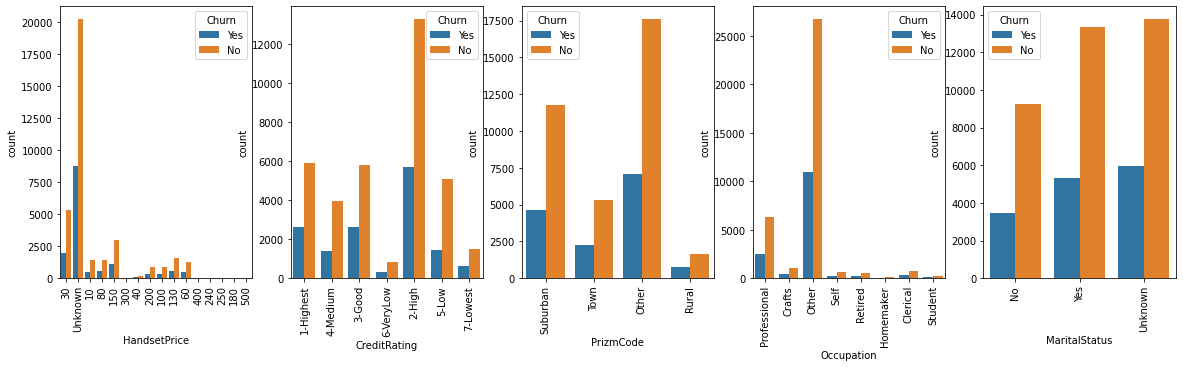

In [ ]:
dataset_new = dataset2[['HandsetPrice','CreditRating','PrizmCode','Occupation','MaritalStatus']]

## visualize distribution of categorical variables with respect to Churn
## I don't see any striking patterns here too
plots_per_row = 5

number_of_plots = dataset_new.select_dtypes(include=['object']).shape[-1]

fig, axes = plt.subplots((number_of_plots//plots_per_row)+(number_of_plots%5!=0),plots_per_row) 

axes = axes.flatten()
i = 0
for index,col in dataset_new.select_dtypes(include=['object']).columns.to_series().items():
    
    a = sns.countplot(x=dataset_new[col],hue=dataset2.Churn,ax=axes[i])
    a.tick_params(axis='x', labelrotation= 90)
    i+=1
    
for i in range(1,len(axes)-number_of_plots+1):
    fig.delaxes(axes[-i]) # remove empty subplot
# plt.tight_layout()

fig.set_figwidth(20)
fig.set_figheight(5)

plt.show()

Following Conclusion can be derived from above visualizations

- Churned customers have average (mean) monthly minutes of use which is less than 530’ minute; 
- They have service for only 11 - 15 months; 
- The numbers of days for their equipment were between 300 & 361 day; 
- The numbers of models issues are less than 2; 
- Their prizm code refer to town; 
- Their handsets have web capability.

**Label Encode Binary data:**

Machine Learning algorithms can typically only have numerical values as their independent variables. Hence label encoding is quite pivotal as they encode categorical labels with appropriate numerical values. Here we are label encoding all categorical variables that have only two unique values.

In [ ]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset2.columns[1:]:
    if dataset2[col].dtype == 'object':
        if len(list(dataset2[col].unique())) <= 2:
            le.fit(dataset2[col])
            dataset2[col] = le.transform(dataset2[col])
            le_count += 1
            print(col)
print('\n {} columns were label encoded.'.format(le_count))

Churn
ChildrenInHH
HandsetRefurbished
HandsetWebCapable
TruckOwner
RVOwner
Homeownership
BuysViaMailOrder
RespondsToMailOffers
OptOutMailings
NonUSTravel
OwnsComputer
HasCreditCard
NewCellphoneUser
NotNewCellphoneUser
OwnsMotorcycle
MadeCallToRetentionTeam

 17 columns were label encoded.


**Check Multicollinearity using VIF:**

Let's try to look into multicollinearity using Variable Inflation Factors (VIF). VIF determines the strength of the correlation of a variable with a group of other independent variables in a dataset. VIF starts usually at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

In [ ]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

dataset2 = dataset2[~dataset2.isin([np.nan, np.inf, -np.inf]).any(1)]
dataset_vif = dataset2[['MonthlyRevenue', 'MonthlyMinutes','TotalRecurringCharge','RoamingCalls','PercChangeMinutes',
                        'PercChangeRevenues','DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls',
                        'ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut',
                        'OffPeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls','CallWaitingCalls','MonthsInService',
                        'CurrentEquipmentDays','AgeHH1','AgeHH2','UniqueSubs','ActiveSubs','HandsetModels','HandsetRefurbished',
                        'HandsetWebCapable','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','RetentionCalls',
                        'RetentionOffersAccepted','NewCellphoneUser','NotNewCellphoneUser','ReferralsMadeBySubscriber',
                        'AdjustmentsToCreditRating','MadeCallToRetentionTeam',
                        'ChildrenInHH','TruckOwner','RVOwner','Homeownership','NonUSTravel','OwnsComputer',
                        'HasCreditCard','IncomeGroup','OwnsMotorcycle']]
                    
calc_vif(dataset_vif)

,variables,VIF
0,MonthlyRevenue,7.944255
1,MonthlyMinutes,11.805974
2,TotalRecurringCharge,8.812301
3,RoamingCalls,1.202495
4,PercChangeMinutes,1.633732
5,PercChangeRevenues,1.613929
6,DroppedCalls,132.305516
7,BlockedCalls,151.964085
8,UnansweredCalls,4.017935
9,CustomerCareCalls,1.514750


**Positive and negative correlation**

In [ ]:
dataset_cor = dataset2[['MonthlyRevenue', 'MonthlyMinutes','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','PercChangeMinutes',
                        'PercChangeRevenues','DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls',
                        'ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut',
                        'OffPeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls','CallWaitingCalls','MonthsInService',
                        'CurrentEquipmentDays','AgeHH1','AgeHH2','UniqueSubs','ActiveSubs','ServiceArea','Handsets','HandsetModels','HandsetRefurbished',
                        'HandsetWebCapable','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','RetentionCalls',
                        'RetentionOffersAccepted','NewCellphoneUser','NotNewCellphoneUser','ReferralsMadeBySubscriber',
                        'AdjustmentsToCreditRating','MadeCallToRetentionTeam','HandsetPrice','CreditRating','PrizmCode','Occupation',
                        'ChildrenInHH','TruckOwner','RVOwner','Homeownership','NonUSTravel','OwnsComputer','MaritalStatus',
                        'HasCreditCard','IncomeGroup','OwnsMotorcycle']]
correlations = dataset_cor.corrwith(dataset2.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 CurrentEquipmentDays       0.103729
MadeCallToRetentionTeam    0.067307
RetentionCalls             0.065228
RetentionOffersAccepted    0.034793
UniqueSubs                 0.034424
HandsetRefurbished         0.029825
MonthsInService            0.018734
OverageMinutes             0.016292
ActiveSubs                 0.015383
Homeownership              0.013248
RoamingCalls               0.011002
PercChangeRevenues         0.010977
ChildrenInHH               0.009639
OwnsMotorcycle             0.007437
NotNewCellphoneUser        0.006713
OptOutMailings             0.000129
dtype: float64

Most Negative Correlations: 
 CallForwardingCalls         -0.001445
OwnsComputer                -0.001941
NonUSTravel                 -0.003022
RVOwner                     -0.003549
TruckOwner                  -0.004999
BlockedCalls                -0.005842
NewCellphoneUser            -0.007810
HasCreditCard               -0.008763
ReferralsMadeBySubscriber   -0.010653
Monthl

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

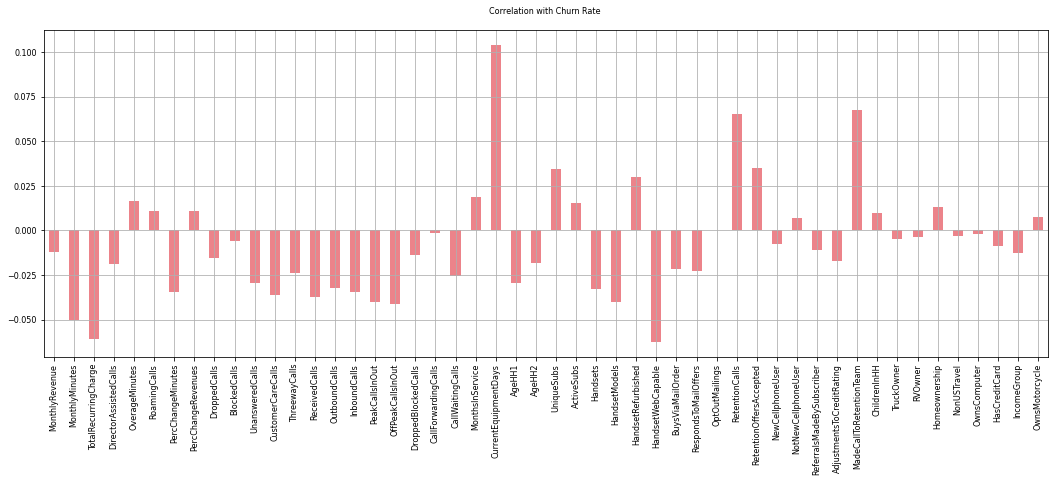

In [ ]:
correlations = dataset_cor.corrwith(dataset2.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 6), 
        fontsize = 8, 
        color = '#ec838a',
        rot = 90, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "8", fontfamily = "sans-serif")

Interestingly, the churn rate increases with current equipment days and retention calls. In contrast HandsetWebCapable, TotalRecurringCharge and MonthlyMinutes seem to be negatively related to churn.




In [ ]:
# Chi squared Independence test between categorical values and Churn. This will help to identify important variables on which Churn depends.
# Based on the test, we can recommend to drop/include them in while training
def chi2test(X,y,alpha=0.05):
    '''
        X : dataframe 
        y : series
    '''
    target = y.name
    print('ch2test with alpha',alpha)
    test_df = []
    for index,col in X.select_dtypes(include=['object']).columns.to_series().items():
        df = pd.concat([y,X[col]],axis=1)
        contingency_table = df.value_counts().rename("counts").reset_index().pivot(index=target,columns=col,values='counts').fillna(0)
        stat, p, dof, expected = chi2_contingency(contingency_table.values)
        test_df.append([target,col,stat,p,'Dependent (reject H0)' if p <= alpha else 'Independent (H0 holds true)','include' if p <= alpha else 'drop'])
        
    test_df = pd.DataFrame(test_df,columns=["variable1","variable2","chi2-stat","p-value","result","recommendation"])
    return test_df

chi2test(dataset2.drop('Churn',axis=1),dataset2['Churn'])

ch2test with alpha 0.05


,variable1,variable2,chi2-stat,p-value,result,recommendation
0,Churn,ServiceArea,959.134195,1.862609e-07,Dependent (reject H0),include
1,Churn,HandsetPrice,70.714644,3.331128e-09,Dependent (reject H0),include
2,Churn,CreditRating,213.755820,2.230416e-43,Dependent (reject H0),include
3,Churn,PrizmCode,18.858659,2.924261e-04,Dependent (reject H0),include
4,Churn,Occupation,9.989170,1.891880e-01,Independent (H0 holds true),drop
5,Churn,MaritalStatus,36.965316,9.399043e-09,Dependent (reject H0),include


Let’s try to drop one of the features to see if it help us in bringing down the variable inflation factor

In [ ]:
#Dropping 'DroppedBlockedCalls':
    
dataset_new = dataset_vif.drop(columns = "DroppedBlockedCalls")
#Revalidate Colinearity:
dataset_new = dataset2[['MonthlyRevenue', 'MonthlyMinutes','TotalRecurringCharge','RoamingCalls','PercChangeMinutes',
                        'PercChangeRevenues','DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls',
                        'ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut',
                        'OffPeakCallsInOut','CallForwardingCalls','CallWaitingCalls','MonthsInService',
                        'CurrentEquipmentDays','AgeHH1','AgeHH2','UniqueSubs','ActiveSubs','HandsetModels','HandsetRefurbished',
                        'HandsetWebCapable','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','RetentionCalls',
                        'RetentionOffersAccepted','NewCellphoneUser','NotNewCellphoneUser','ReferralsMadeBySubscriber',
                        'AdjustmentsToCreditRating','MadeCallToRetentionTeam',
                        'ChildrenInHH','TruckOwner','RVOwner','Homeownership','NonUSTravel','OwnsComputer',
                        'HasCreditCard','IncomeGroup','OwnsMotorcycle']]
calc_vif(dataset_new)

,variables,VIF
0,MonthlyRevenue,7.939816
1,MonthlyMinutes,11.805717
2,TotalRecurringCharge,8.811924
3,RoamingCalls,1.202373
4,PercChangeMinutes,1.633584
5,PercChangeRevenues,1.613913
6,DroppedCalls,2.656500
7,BlockedCalls,1.374123
8,UnansweredCalls,4.015479
9,CustomerCareCalls,1.483598


In our example, after dropping the ‘DroppedBlockedCalls’ variable, VIF values for all the independent variables have decreased to a considerable extent.

In [ ]:
#Applying changes in the main dataset: 
dataset2 = dataset2.drop(columns = "DroppedBlockedCalls")

In [ ]:
dataset2.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',


# 4. Data Preprocessing

**Encode Categorical data**:

Any categorical variable that has more than two unique values have been dealt with Label Encoding and one-hot Encoding using get_dummies method in pandas here.

In [ ]:
#Incase if user_id is an object:
    
identity = dataset2["CustomerID"]
dataset2 = dataset2.drop(columns="CustomerID")
#Convert rest of categorical variable into dummy:
dataset2= pd.get_dummies(dataset2)
#Rejoin userid to dataset:
dataset2 = pd.concat([dataset2, identity], axis = 1)

**Split the dataset into dependent and independent variables:**

Now we need to separate the dataset into X and y values. y would be the ‘Churn’ column whilst X would be the remaining list of independent variables in the dataset.

In [ ]:
#Identify target variable:
    
target = dataset2["Churn"]
dataset2 = dataset2.drop(columns="Churn")

Generate training and test datasets: Let’s decouple the master dataset into training and test set with an 80%-20% ratio.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset2, target,stratify=target, test_size = 0.2, random_state = 0)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (40818, 835)
Number transactions y_train dataset:  (40818,)
Number transactions X_test dataset:  (10205, 835)
Number transactions y_test dataset:  (10205,)


In [ ]:
# Remove Identifiers: Separate ‘customerID’ from training and test data frames.
train_identity = X_train['CustomerID']
X_train = X_train.drop(columns = ['CustomerID'])
test_identity = X_test['CustomerID']
X_test = X_test.drop(columns = ['CustomerID'])

**Conduct Feature Scaling**:

It’s quite important to normalize the variables before conducting any machine learning (classification) algorithms so that all the training and test variables are scaled within a range of 0 to 1.

In [ ]:
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# 5. Model Selection

The modelling approach used for the project is - **Classification (Binary Classification)**

Binary Classification is classification predictive modelling where tasks have only two labels. (Here, churn prediction –churn or not).

From different classifiers like Logistic Regression, Linear SVM, Random forest, Decision Tree will find the optimal model of choice.


**Compare Baseline Classification Algorithms (1st Iteration):**

Let’s model each classification algorithm over the training dataset and evaluate their accuracy and standard deviation scores. Classification Accuracy is one of the most common classification evaluation metrics to compare baseline algorithms as its the number of correct predictions made as a ratio of total predictions. However, it's not the ideal metric when we have class imbalance issue. Hence, let us sort the results based on the ‘Mean AUC’ value which is nothing but the model’s ability to discriminate between positive and negative classes.

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

In [ ]:
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score( model, X_train[:5000], y_train[:5000], cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score( model, X_train[:5000], y_train[:5000], cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

In [ ]:
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,Random Forest,62.18,2.91,72.34,2.94
0,Logistic Regression,55.63,1.45,55.98,1.72
2,Kernel SVM,54.39,2.82,70.92,2.48
5,Decision Tree Classifier,53.60,2.05,62.46,1.58
3,KNN,52.89,1.58,67.50,2.24
4,Gaussian NB,49.93,0.85,30.56,2.46
1,SVC,49.88,2.77,70.52,2.53


Lets Visualize Classification Algorithms Accuracy Comparisons using Accuracy Mean

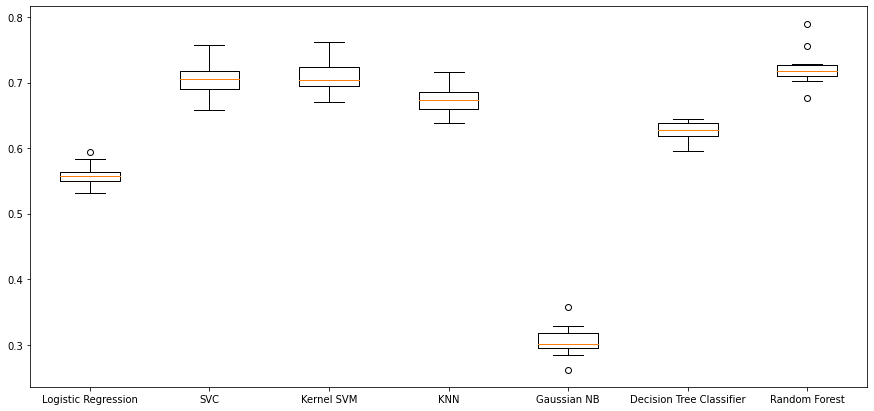

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

Lets Visualize Classification Algorithms Accuracy Comparisons using AUC Mean

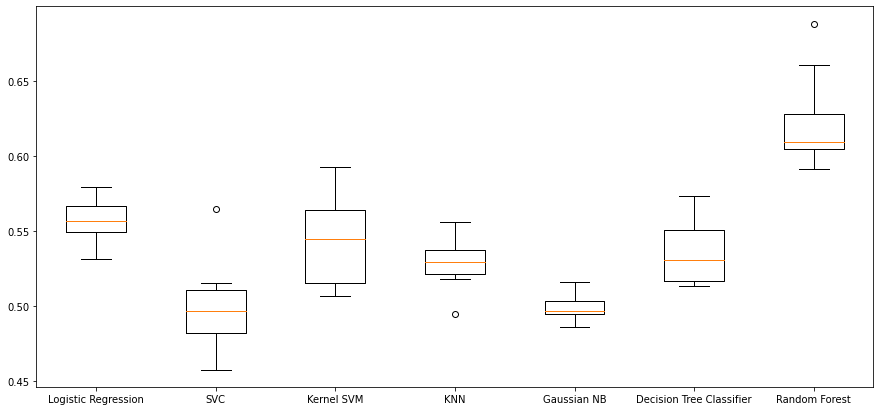

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

From the first iteration of baseline classification algorithms, we can see that Logistic Regression and Random Forest have outperformed the other five models for the chosen dataset with the highest mean AUC Scores. Let’s reconfirm our results in the second iteration as shown in the next steps

Get the right parameters for the baseline models: Before doing the second iteration, let’s optimize the parameters and finalize the evaluation metrics for model selection.

Identify the optimal number of K neighbors for KNN Model: In the first iteration, we assumed that K = 3, but in reality, we don’t know what is the optimal K value that gives maximum accuracy for the chosen training dataset. Therefore, let us write a for loop that iterates 20 to 30 times and gives the accuracy at each iteration so as to figure out the optimal number of K neighbors for the KNN Model.

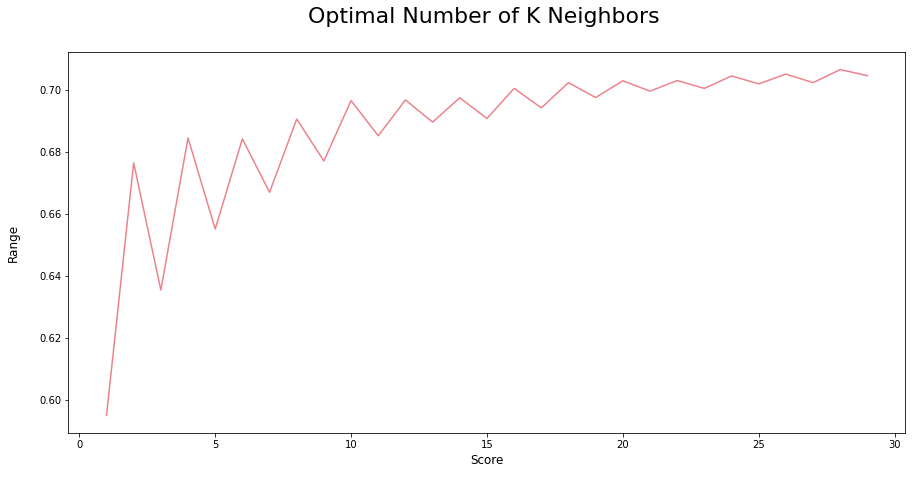

In [ ]:
score_array = []
for each in range(1,30):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,30),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

As we can see from the above iterations, if we use K = 28, then we will get the maximum score of approximately 72%.

Identify the optimal number of trees for Random Forest Model:

Quite similar to the iterations in the KNN model, here we are trying to find the optimal number of decision trees to compose the best random forest.

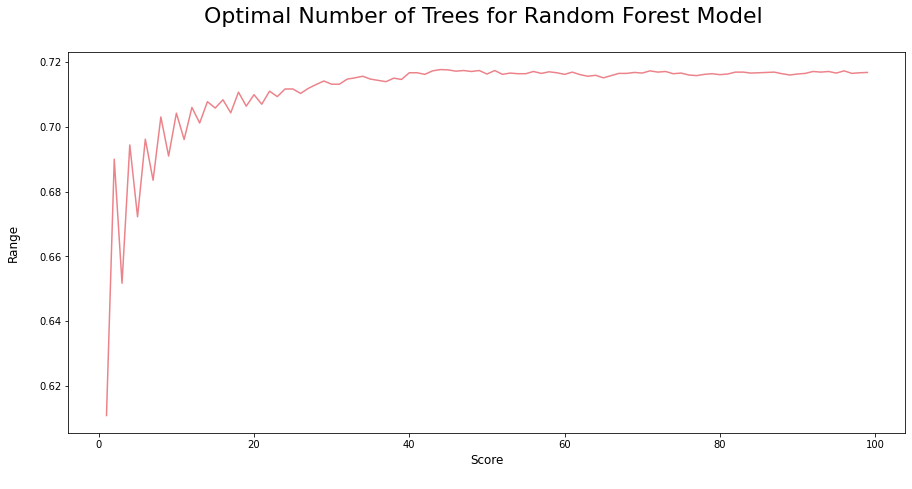

In [ ]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

As we could see from the iterations above, the random forest model would attain the highest accuracy score when its n_estimators = 40.

**Compare Baseline Classification Algorithms (2nd Iteration):**

In the second iteration of comparing baseline classification algorithms, we would be using the optimised parameters for KNN and Random Forest models. Also, we know that false negatives are more costly than false positives in a churn and hence let’s use precision, recall and f2 score as the ideal metric for the model selection.

In [ ]:
classifiers = []
classifiers.append(('Logistic Regression', LogisticRegression(random_state = 0,max_iter=500)))
classifiers.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
classifiers.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
classifiers.append(('KNN', KNeighborsClassifier(n_neighbors = 28, metric = 'minkowski', p = 2)))
classifiers.append(('Gaussian NB', GaussianNB()))
classifiers.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
classifiers.append(('Random Forest', RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)))

In [ ]:
#Evaluating Model Results:
accuracy = []
precision = []
recall = []
f2_score = []
names = []

# set table to table to populate with performance results
col = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'F2 Score']
classifier_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model:
for name, classifier in classifiers:

    # Fitting Logistic Regression to the Training set
    classifier.fit(X_train[:5000], y_train[:5000])

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    #Evaluate results
    acc = accuracy_score(y_test, y_pred )
    prec = precision_score(y_test, y_pred )
    rec = recall_score(y_test, y_pred )
    f2 = fbeta_score(y_test, y_pred, beta=2.0)


    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f2_score.append(f2)
    names.append(name)

    classifier_results.loc[i] = [name,
                         round(acc*100, 2),
                         round(prec*100, 2),
                         round(rec*100, 2),
                         round(f2*100, 2)
                         ]
    i += 1


In [ ]:
classifier_results = classifier_results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print(classifier_results)

                 Classifier  Accuracy  Precision  Recall  F2 Score
6             Random Forest     71.39      54.85    3.84      4.72
3                       KNN     71.11      40.00    0.54      0.68
0       Logistic Regression     68.66      37.74   13.50     15.49
1                       SVC     69.39      33.39    6.29      7.51
5  Decision Tree Classifier     61.30      32.74   32.55     32.59
2                Kernel SVM     69.86      31.72    4.01      4.86
4               Gaussian NB     31.25      28.78   94.05     64.71


From the 2nd iteration, we can definitely conclude that **Random Forest is an optimal model of choice for the given dataset** as it has relatively the highest combination of precision, recall and F2 scores; giving most number of correct positive predictions while minimizing the false negatives. Hence, let's try to use Random Forest and evaluate its performance in the forthcoming sections.

# 6. Model Evaluation

Train & evaluate Chosen Model: Let’s fit the selected model (Random Forest Classifier in this case) on the training dataset and evaluate the results.

In [ ]:
classifier = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

#probability score
y_pred_probs = classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Random Forest',round(acc*100,2), round(prec*100,2), round(rec*100,2), round(f2*100,2)]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F2 Score'])
print (results)

           Model  Accuracy  Precision  Recall  F2 Score
0  Random Forest     71.78      63.51     4.8      5.88


# 7. Future Predictions

**Visualize results on a Confusion Matrix:**

[[7184   81]
 [2799  141]]
Test Data Accuracy: 71.7800




<Figure size 2016x1440 with 0 Axes>

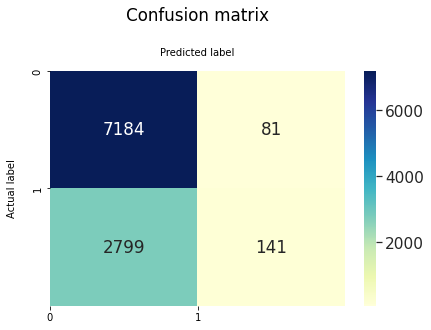

In [ ]:
# Validate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)

# Confusion Matrix as a quick Crosstab:
pd.crosstab(y_test,pd.Series(y_pred), rownames=['ACTUAL'],colnames=['PRED'])

# visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % round(accuracy_score(y_test, y_pred)*100,2))
print("\n")

The Confusion matrix indicates that we have 7184+141 correct predictions and 2799+81 incorrect predictions. 

Accuracy rate = number of correct predictions/ total predictions * 100 

Error rate = Number of wrong predictions / total predictions * 100 

We have got an accuracy of 80%; signalling the characteristics of a reasonably good model.

Format Final Results

Unpredictability and risk are the close companions of any predictive models. Therefore in the real world, its always a good practice to build a propensity score besides an absolute predicted outcome. Instead of just retrieving a binary estimated target outcome (0 or 1), every ‘Customer ID’ could get an additional layer of propensity score highlighting their percentage of probability to take the target action.

In [ ]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['CustomerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

In [ ]:
display(final_results.head(20))

,CustomerID,Churn,predictions,propensity_to_churn(%),Ranking
11378,3089742,0,0,15.0,10
15858,3124522,0,0,28.0,6
9212,3072466,0,0,24.0,7
12372,3097598,0,0,15.0,10
12173,3096002,0,0,32.0,4
12043,3094974,0,0,26.0,6
42236,3336030,0,0,38.0,2
49475,3388122,0,0,15.0,10
48423,3380942,0,0,13.0,10
45550,3360514,0,0,9.0,10
